<a href="https://colab.research.google.com/github/Shubhamsingh-ss02/HOUSE-PRICE-ESTIMATION-BY-USING-DEEP-LEARNING-A-CASE-STUDY/blob/main/Housing_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Data cleaning and formatting

Data collected is messy which means we need to clean and arrange it into an acceptable format before we can even start the analysis. Data cleaning is necessary part of most actual data science problems.

In [ ]:
# data exploration and visualization

import pandas as pd 
import numpy as np 

import os
import matplotlib.pyplot as plt
%matplotlib inline 

plt.rcParams["font.size"]=24

import seaborn as sns

sns.set(font_scale=2)

from IPython.core.pylabtools import figsize


# for saving the all the images we creat in this program

root_dir = "."
project_id = "Ames_housing"
image_path = os.path.join(root_dir,"images",project_id)

def save_fig(fig_id, tight_layout=True, extension="png", dim=300):
    os.makedirs(image_path,exist_ok=True)
    fig_path = os.path.join(image_path,fig_id+"."+extension)
    print("saving ...."+fig_id)
    if tight_layout:
        plt.tight_layout()
        plt.savefig(fig_id, format=extension, dpi=dim)
        
#Ignore all the warnings        
import warnings
warnings.filterwarnings("ignore")
import missingno as msno

In [ ]:
# Read in train and test data into a dataframe 

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

#checking the size of the train and test data

print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [ ]:
# display the content of the train data
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


This is a subset of the full data which contains 81 columns. Already, we can see a couple issues: first, we know that we want to predict the SalePrice. We tried to study all the columns and predict the columns which plays a major weight in the prediction of the sales price.

In [ ]:
#give the details information of the train data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

We can see the number of the missing terms in respective columns and also the the types of the datatypes for each columns. This helps to some idea related to the missing values and the datatyps for further analysis.

In [ ]:
# display the content of the test data
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


This is a subset of the full data which contains 80 columns as it is a test that. it donot consist of the target columns. We can see a couple issues: first, we know that we want to predict the SalePrice of the test database which the train model. We have to test the test data at the end to check its accuracy and need to do all the modification of the test data as we do in train data.

In [ ]:
#give the details information of the test data
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

Missing Values:

We can look at the percentage of missing values in each column. Missing values are fine when we do Exploratory Data Analysis, but they will have to be filled in for machine learning methods.

Below we create a function that calculates the number of missing values and the percentage of the total values that are missing for each column.

In [ ]:
#Missing value findind functions
def mis_val(df):
    mis_val_sum = df.isnull().sum()
    percent_mis = mis_val_sum * 100 / len(df)
    table = pd.concat([mis_val_sum,percent_mis], axis=1)
    table = table.rename(columns={0:"missing values", 1:"percent of missing value"})
    table = table[table["missing values"]!=0].sort_values("percent of missing value", ascending =False).round(1)
    print("dataframe has", df.shape[1],"columns.\n", table.shape[0],"have missing values")
    return table

In [ ]:
#Calling a function which calculates the missing values
table_train = mis_val(train)

# Dispalying the missing values along with its percentages
table_train

dataframe has 81 columns.
 19 have missing values


,missing values,percent of missing value
PoolQC,1453,99.5
MiscFeature,1406,96.3
Alley,1369,93.8
Fence,1179,80.8
FireplaceQu,690,47.3
LotFrontage,259,17.7
GarageType,81,5.5
GarageYrBlt,81,5.5
GarageFinish,81,5.5
GarageQual,81,5.5


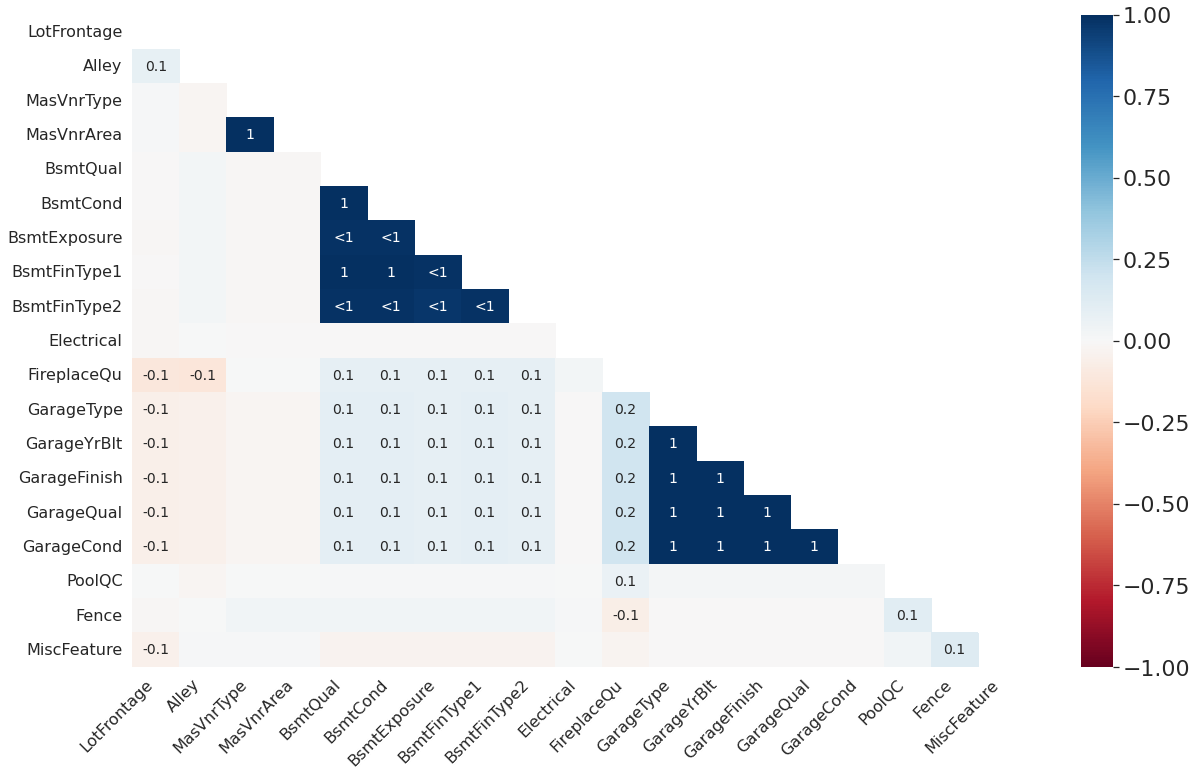

In [ ]:
msno.heatmap(train)

we must be careful to not discard information and should be careful when dropping columns, if a column has a high percentage of missing values, then it probably will not be of much use.

What columns to retain may be a little arbitrary (here is a discussion), but for this project, we will remove any columns with more than 40% missing values.

In [ ]:
#calling the function to calculate the missing values in the test set
table_test = mis_val(test)
table_test

dataframe has 80 columns.
 33 have missing values


,missing values,percent of missing value
PoolQC,1456,99.8
MiscFeature,1408,96.5
Alley,1352,92.7
Fence,1169,80.1
FireplaceQu,730,50.0
LotFrontage,227,15.6
GarageCond,78,5.3
GarageYrBlt,78,5.3
GarageQual,78,5.3
GarageFinish,78,5.3


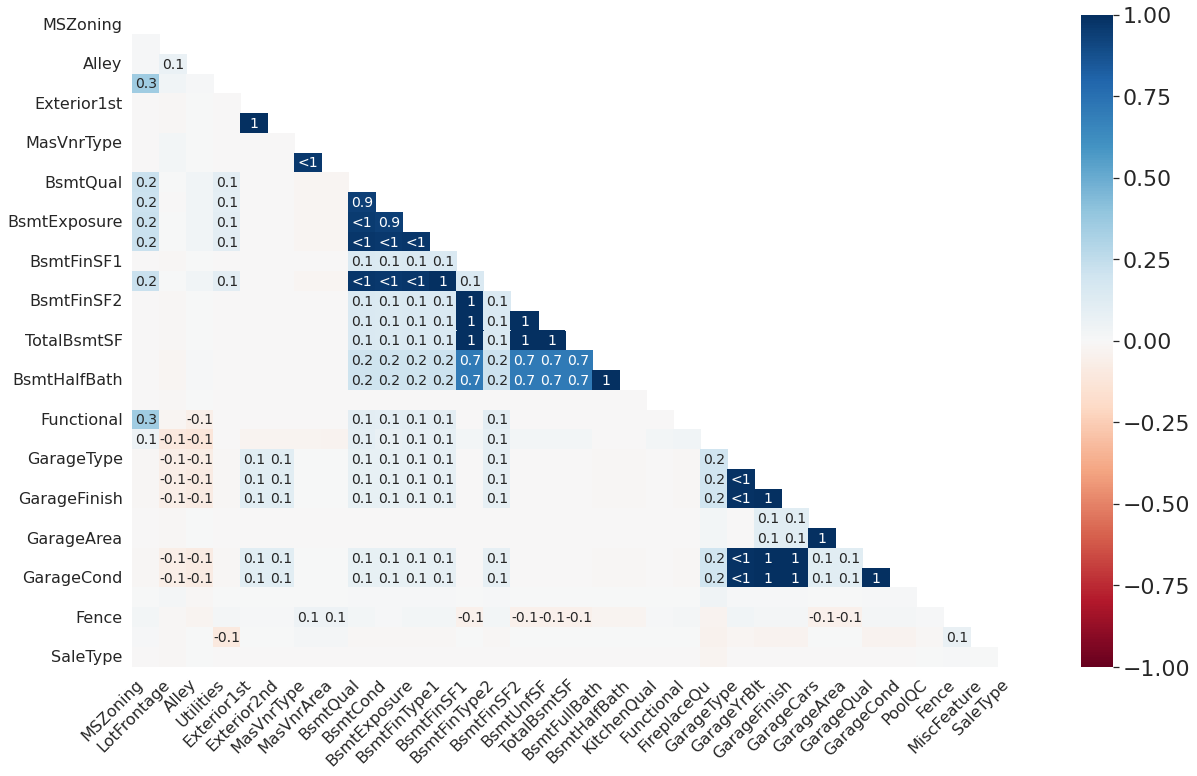

In [ ]:
msno.heatmap(test)

For this project, we will remove any columns with more than 40% missing values.

We have to drop the columns from the both train and the test set

In [ ]:
#listing all the columns from the train and test set whose missing percentage is more than 40%

missing_train = list(table_train[table_train["percent of missing value"]>40].index)
missing_test = list(table_test[table_test["percent of missing value"]>40].index)

In [ ]:
# Checking the shape and size of the train and test dataframe
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


# Step:2-Exploratory Data Analysis

Exploratory Data Analysis is an open-ended process where we make plots and calculate statistics in order to explore our data. The purpose is to to find anomalies, patterns, trends, or relationships.In short, the goal of EDA is to determine what our data can tell us! EDA generally starts out with a high-level overview, and then narrows in to specific parts of the dataset once as we find interesting areas to examine.

To begin the EDA, we will focus on a single variable, the Energy Star Score, because this is the target for our machine learning models. We can rename the column to score for simplicity and then start exploring this value.

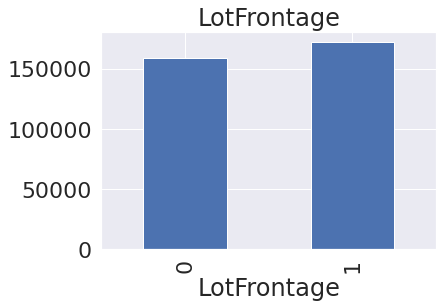

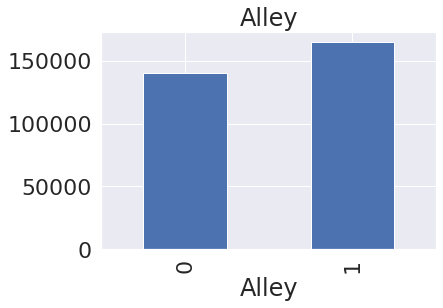

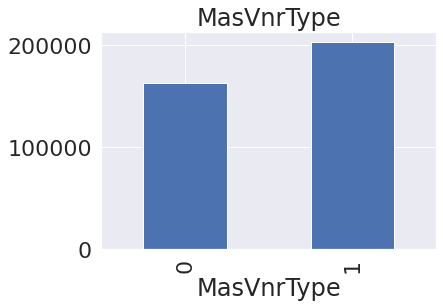

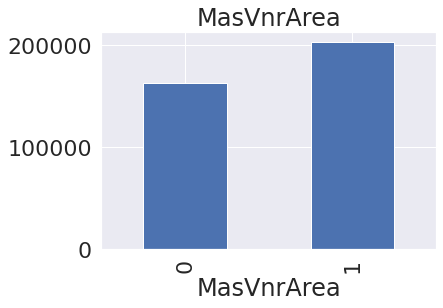

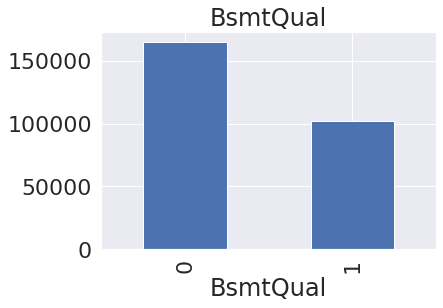

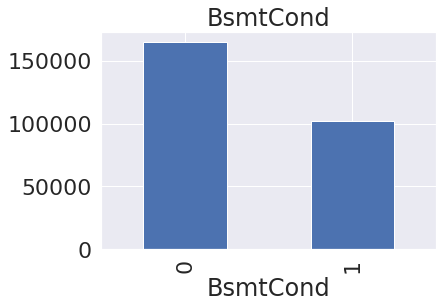

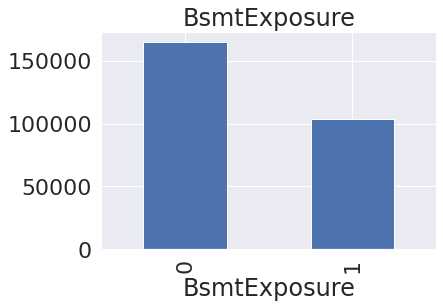

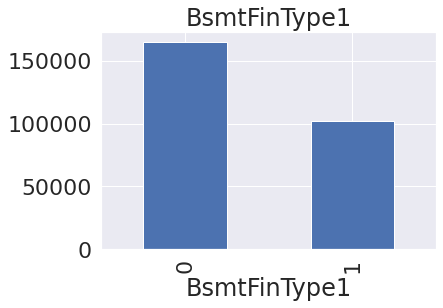

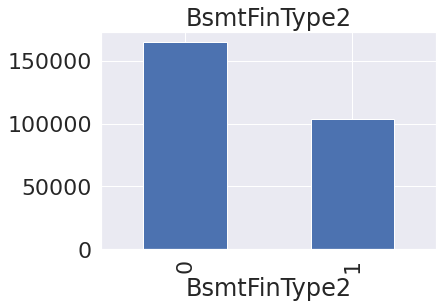

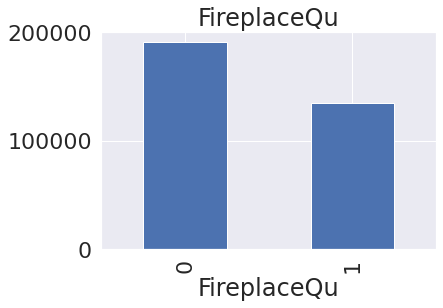

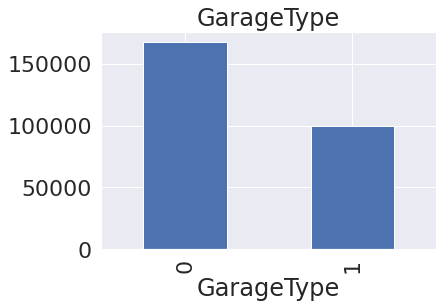

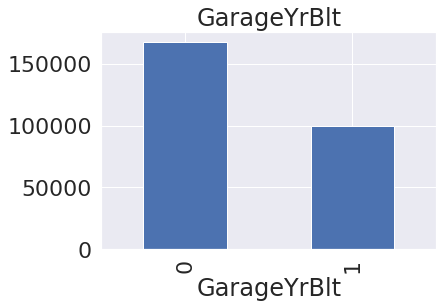

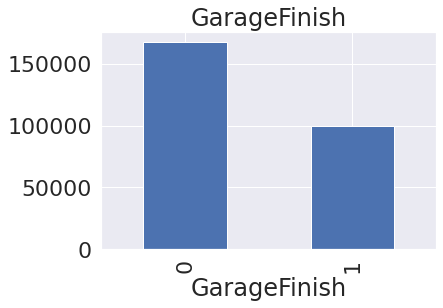

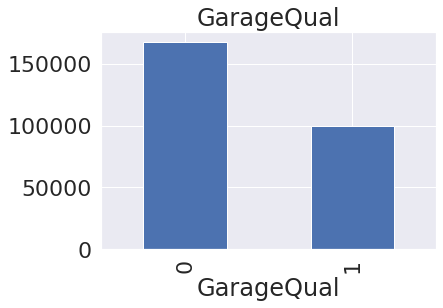

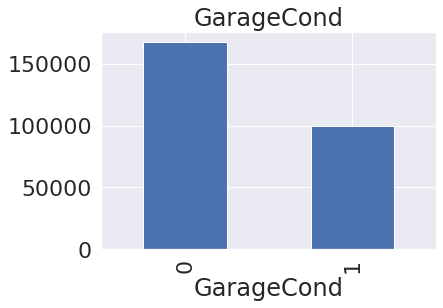

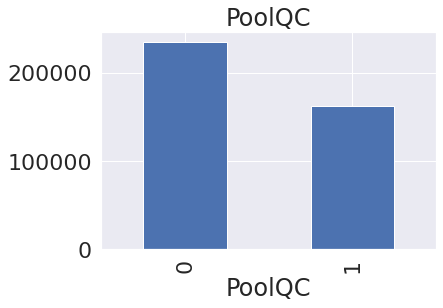

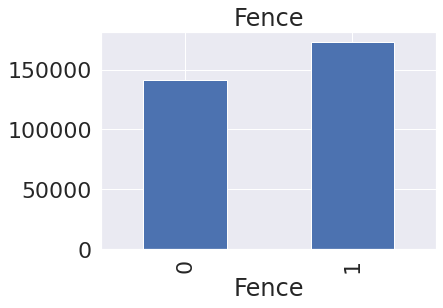

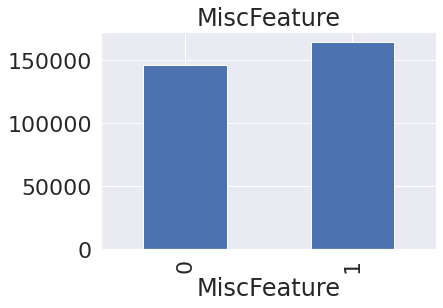

In [ ]:
# Checkinng all the missing values from the each columns and plot in a graph

features_with_na = [features for features in train.columns if train[features].isnull().sum()>1]

for features in features_with_na:
    data=train.copy()
    
    #lets make a variable that indicates 1 if the observation was missing or zero
    data[features] = np.where(data[features].isnull(),1,0)
    #lets calculate the mean salesprice where the information is missing
    data.groupby(features)['SalePrice'].median().plot.bar()
    plt.title(features)
    plt.show()

In [ ]:
#checking all the numerical colums present in the dataframe

numerical_features = [features for features in train.columns if train[features].dtypes != 'O']
print("Number of numeric variables: ",len(numerical_features))
train[numerical_features].head()

Number of numeric variables:  38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


Text(0.5, 1.0, 'House Price vs YearSold')

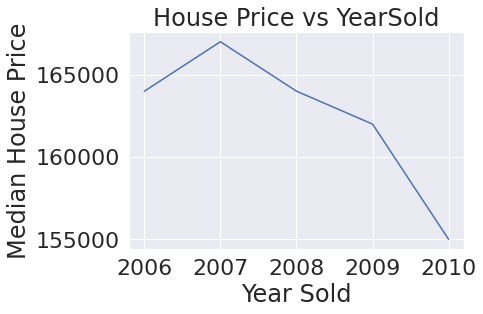

In [ ]:
#checking the columns which contains year information to predict their impacts

year_features = [features for features in numerical_features if 'Yr' in features or 'Year' in features]
print(year_features)
train.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title('House Price vs YearSold')

From the above graph we can see that there is a impact of the year on the price of  the house.

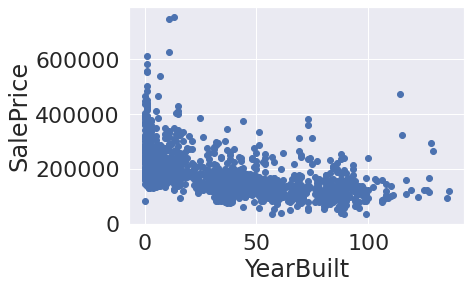

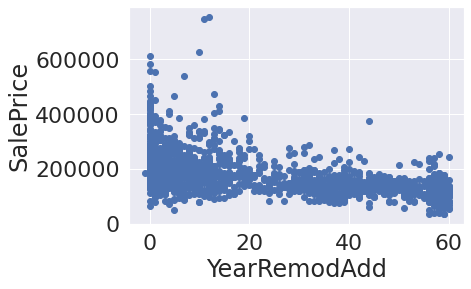

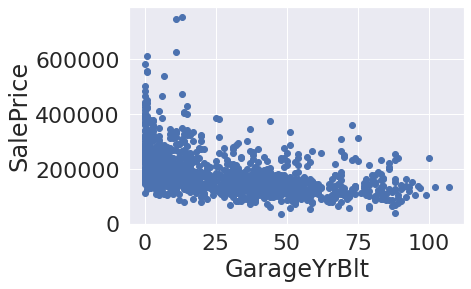

In [ ]:
# We can also use scatter plot to check the SalePrice based on the columns which is based on the year
for features in year_features:
    
    if features != 'YrSold':
        data=train.copy()
        
        data[features]=data['YrSold'] - data[features]
        
        plt.scatter(data[features],data['SalePrice'])
        plt.xlabel(features)
        plt.ylabel('SalePrice')
        plt.show()

We will go for the discrete data present in the dataframe. We will analyse the data and based on the analysis we will try to predict the best attributes which contribute most to predict our SalesPrice.

In [ ]:
discrete_features = [features for features in numerical_features if len(train[features].unique())<25 and features not in year_features+['Id']]
print("Discrete Varibales Count: {}".format(len(discrete_features)))

Discrete Varibales Count: 17


In [ ]:
# Displaying the list of of the discrete columns present in the dataframe.
print(discrete_features)

['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold']


In [ ]:
# Visualizing the data of the  discrete set
train[discrete_features].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


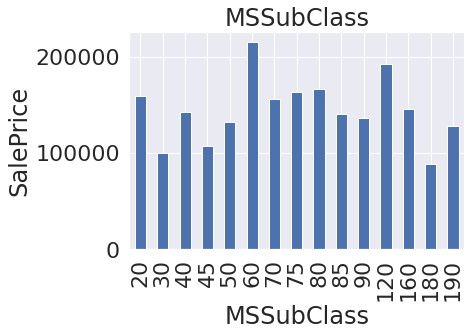

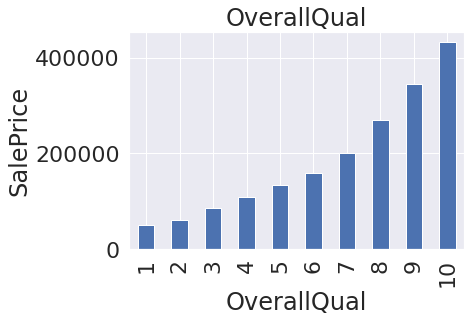

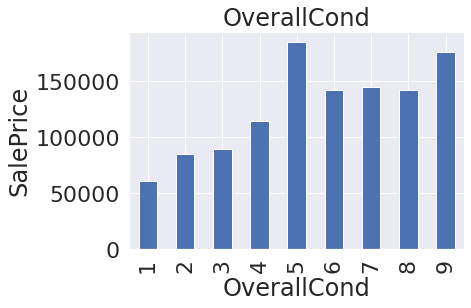

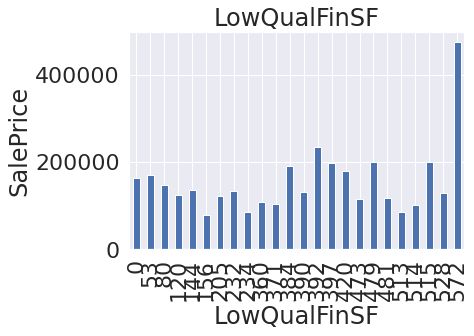

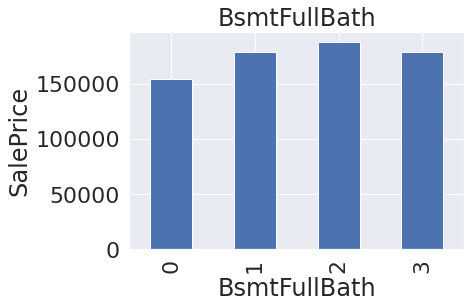

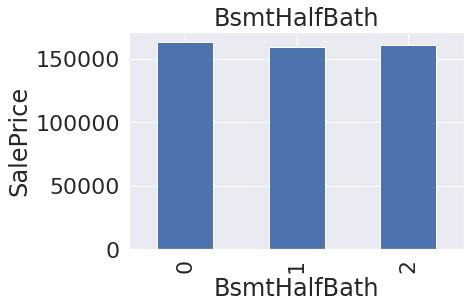

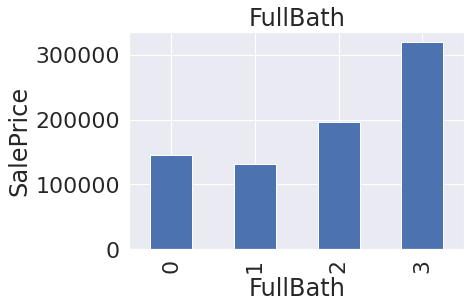

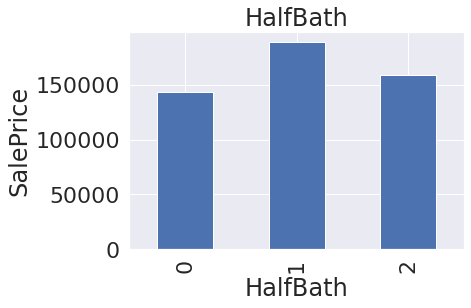

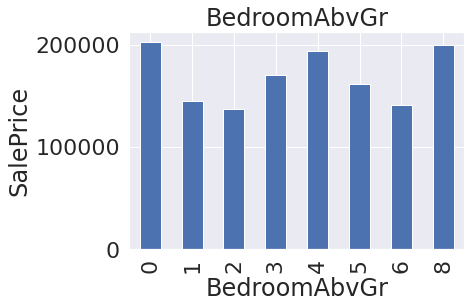

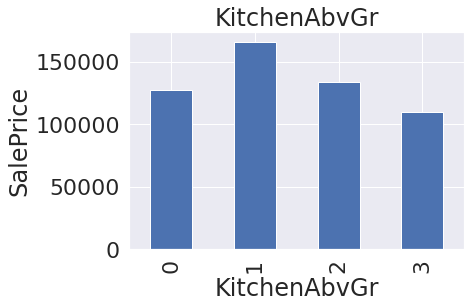

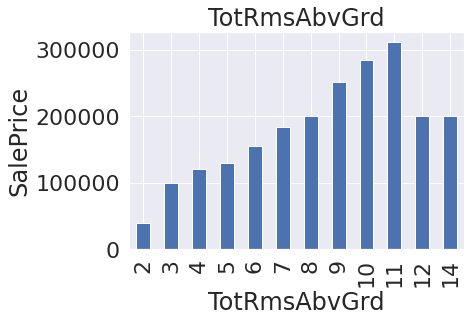

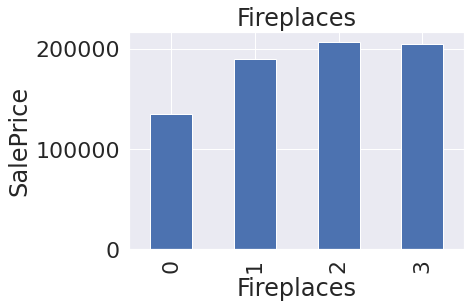

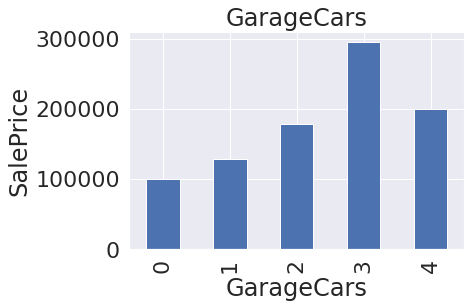

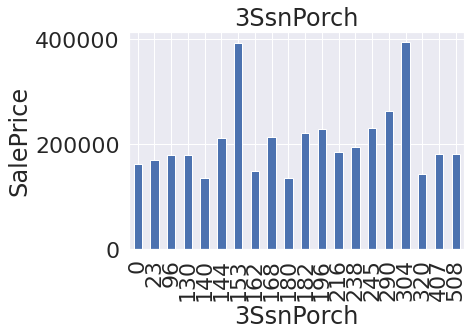

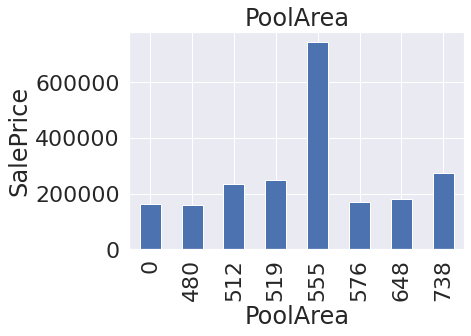

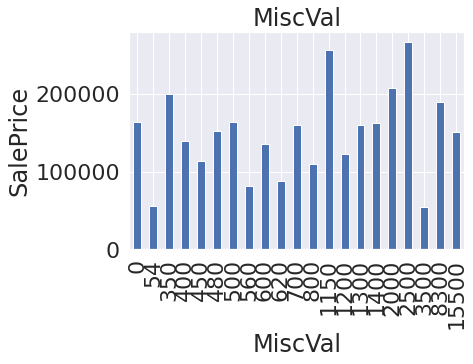

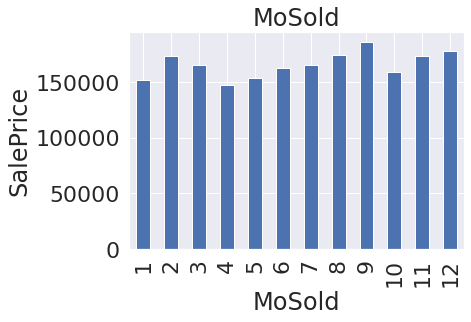

In [ ]:
# Plotting the bar graph of all the discret columns present in our dataframe.

for features in discrete_features:
    data = train.copy()
    data.groupby(features)['SalePrice'].median().plot.bar()
    plt.xlabel(features)
    plt.ylabel('SalePrice')
    plt.title(features)
    plt.show()  

In [ ]:
# Now we will look for the continous data in the dataframe and display the continous data
continous_feature = [features for features in numerical_features if features not in discrete_features+year_features+['Id']]
print("Continous feature count {}".format(len(continous_feature)))

Continous feature count 16


In [ ]:
#displaying the continous data
print(continous_feature)

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']


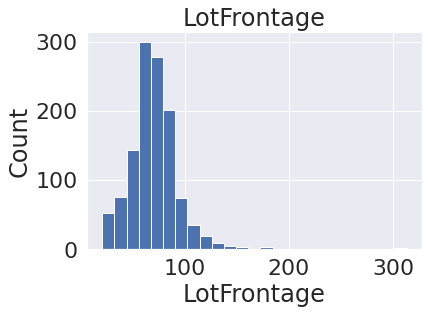

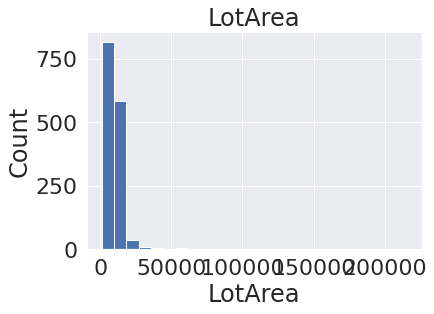

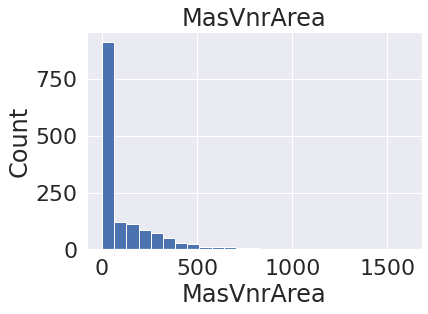

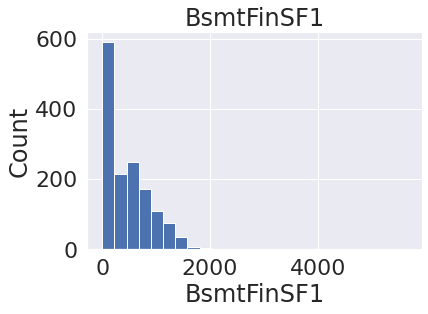

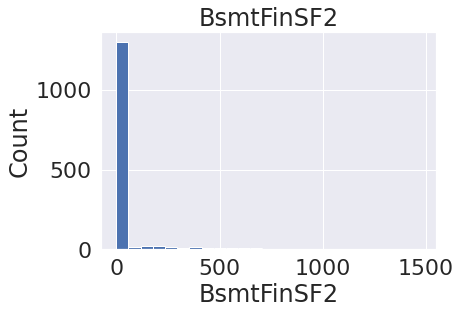

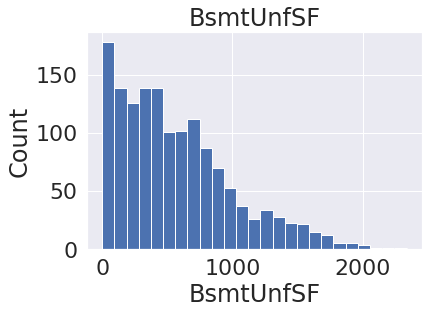

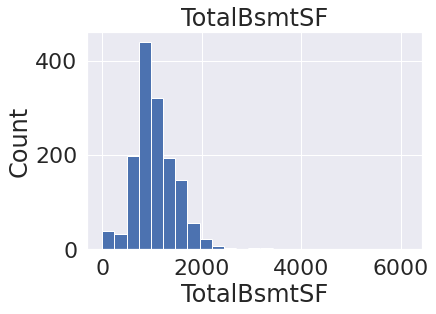

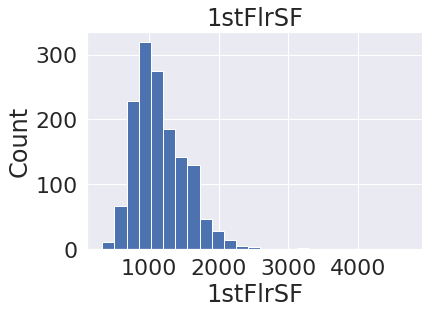

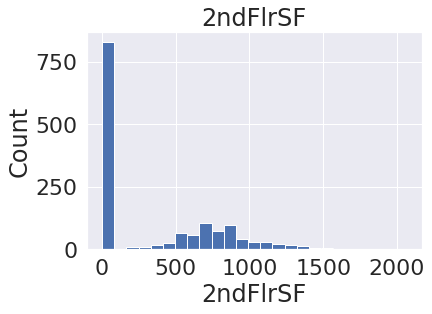

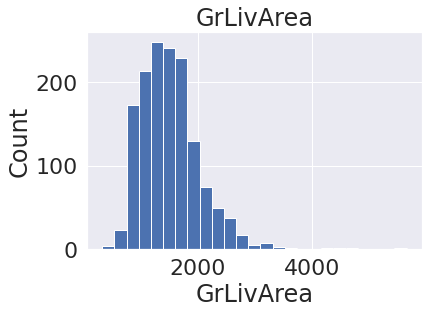

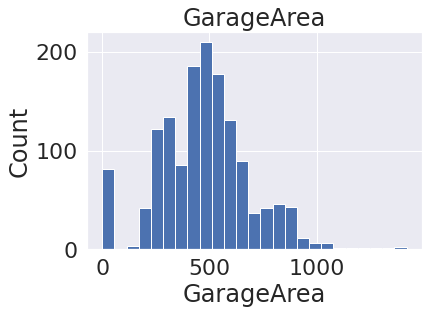

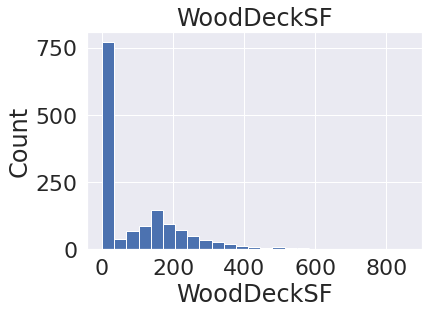

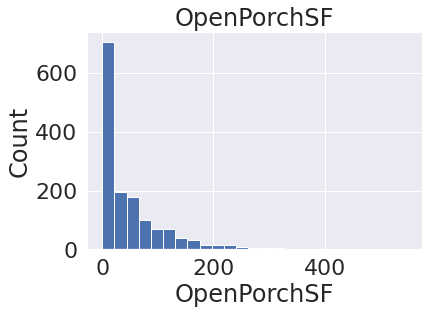

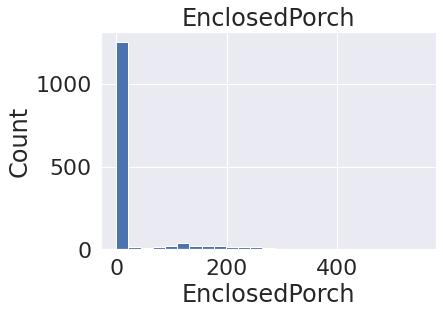

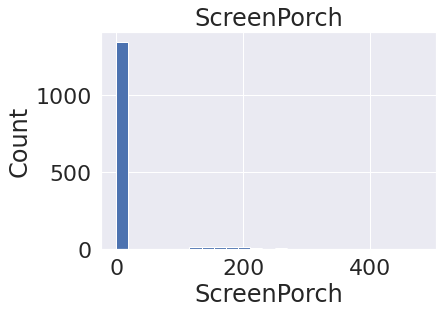

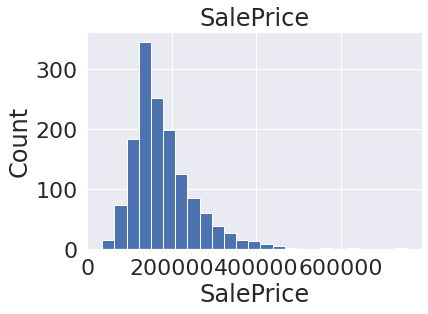

In [ ]:
#displaying the histogram plot of the continous data

for features in continous_feature:
    data = train.copy()
    data[features].hist(bins=25)
    plt.xlabel(features)
    plt.ylabel("Count")
    plt.title(features)
    plt.show()

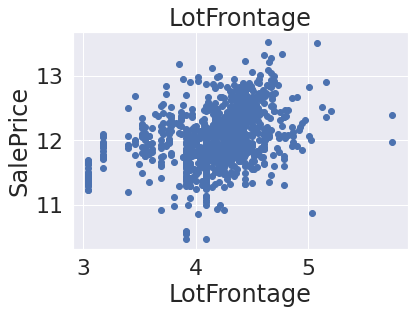

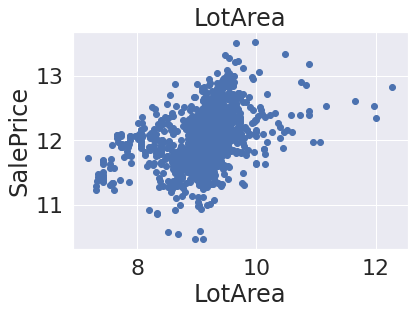

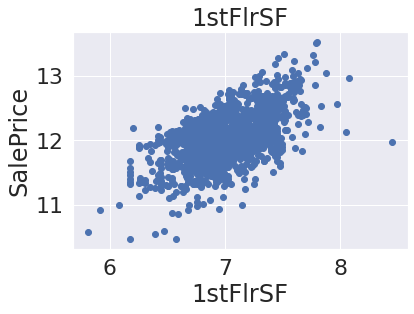

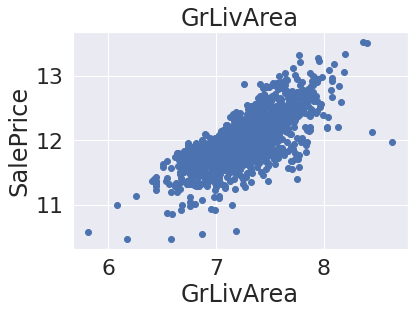

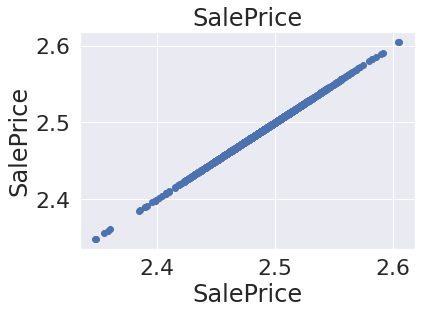

In [ ]:
# We can see and analyze the data using scatter plot for the continous data.

for features in continous_feature:
    data = train.copy()
    if 0 in data[features].unique():
        pass
    else:
        data[features] = np.log(data[features])
        data['SalePrice'] = np .log(data['SalePrice'])
        plt.scatter(data[features],data['SalePrice'])
        plt.xlabel(features)
        plt.ylabel('SalePrice')
        plt.title(features)
        plt.show()

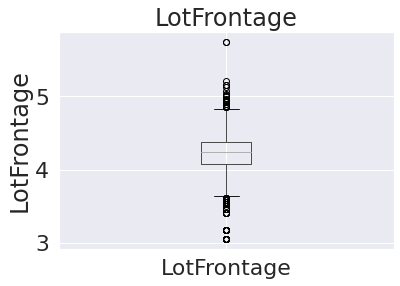

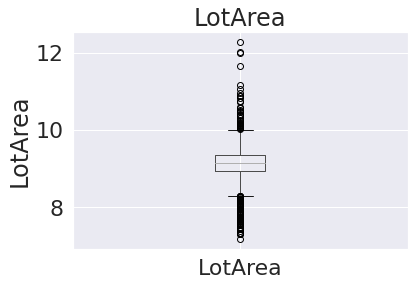

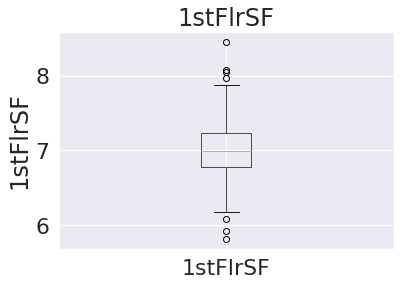

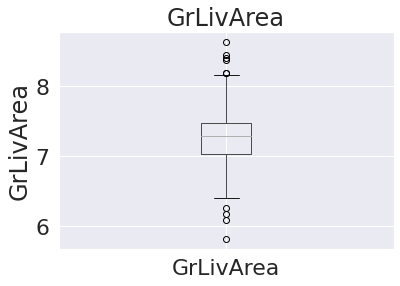

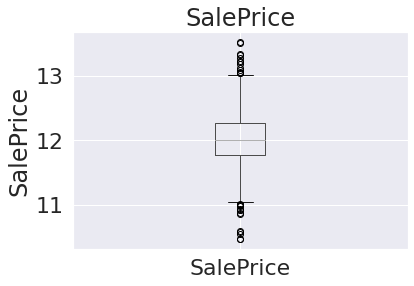

In [ ]:
# We can see plot the boxplot to see the outliers in the continous features of the dataset

for features in continous_feature:
    data = train.copy()
    if 0 in data[features].unique():
        pass
    else:
        data[features] = np.log(data[features])
        data.boxplot(column=features)
        plt.ylabel(features)
        plt.title(features)
        plt.show()

In [ ]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [ ]:
#categorical variables:
categorical_features = [features for features in train.columns if data[features].dtypes == 'O']

In [ ]:
print(categorical_features)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [ ]:
train[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [ ]:
# checking the unique value in each of the columns of the categorical variables
for features in categorical_features:
    print("The feature is {} and the number of categories are {}".format(features,len(train[features].unique())))
    print("The feature is {} and the number of categories are {}".format(features,len(test[features].unique())))
    print("...............................................")

The feature is MSZoning and the number of categories are 5
The feature is MSZoning and the number of categories are 6
...............................................
The feature is Street and the number of categories are 2
The feature is Street and the number of categories are 2
...............................................
The feature is Alley and the number of categories are 3
The feature is Alley and the number of categories are 3
...............................................
The feature is LotShape and the number of categories are 4
The feature is LotShape and the number of categories are 4
...............................................
The feature is LandContour and the number of categories are 4
The feature is LandContour and the number of categories are 4
...............................................
The feature is Utilities and the number of categories are 2
The feature is Utilities and the number of categories are 2
...............................................
The fe

In [ ]:
["Exterior2nd","Foundation","Neighborhood","GarageType","RoofStyle","Street","SaleCondition","PavedDrive",
 "LandContour","GarageFinish"]

['Exterior2nd',
 'Foundation',
 'Neighborhood',
 'GarageType',
 'RoofStyle',
 'Street',
 'SaleCondition',
 'PavedDrive',
 'LandContour',
 'GarageFinish']

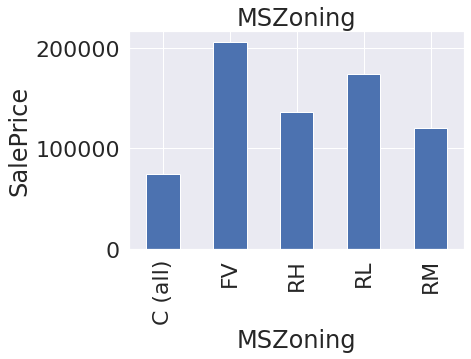

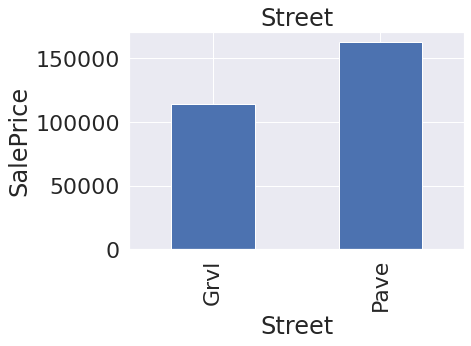

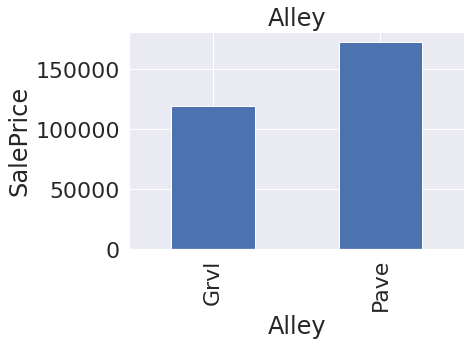

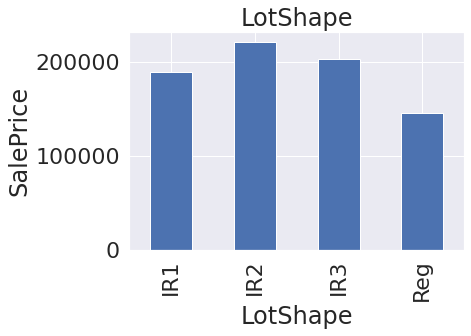

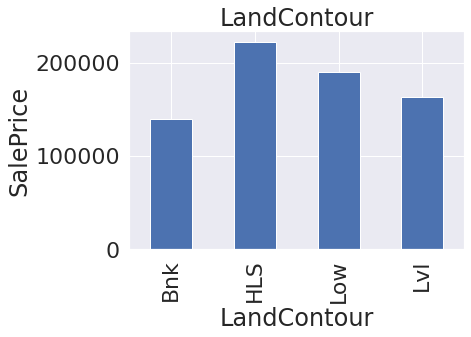

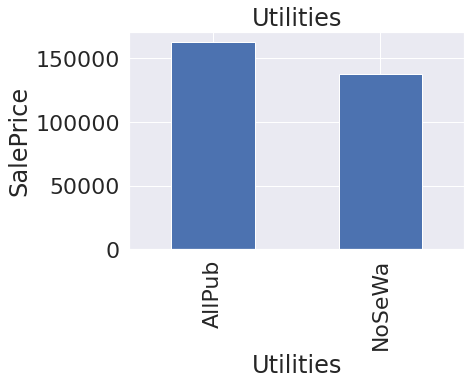

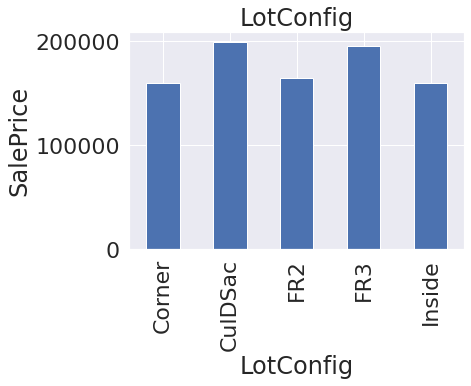

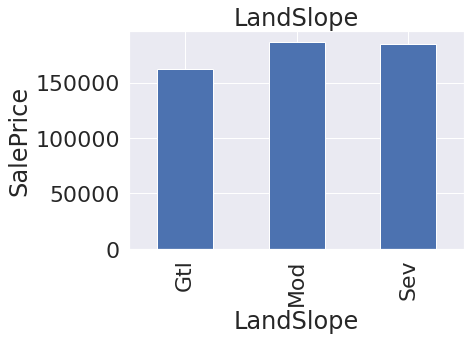

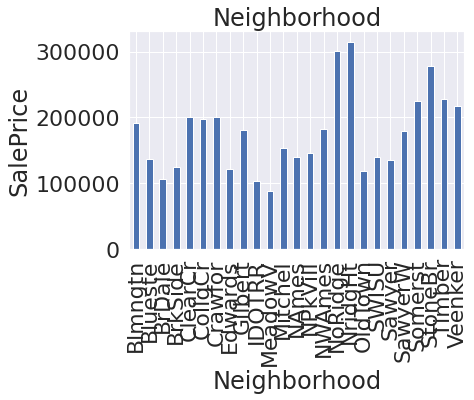

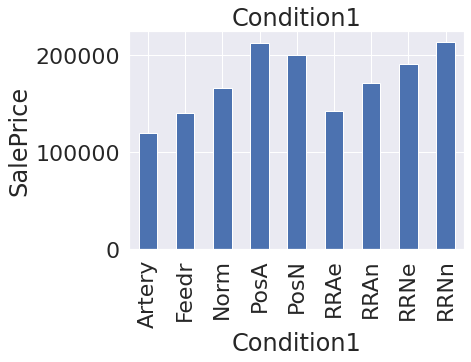

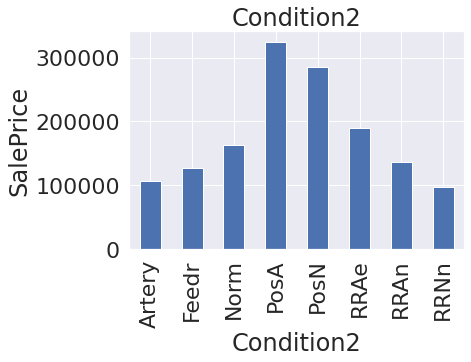

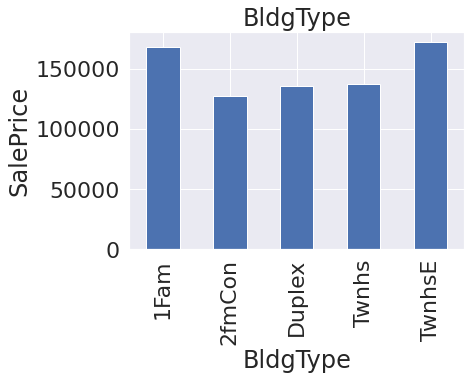

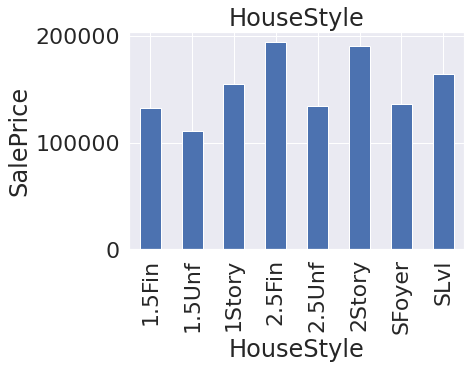

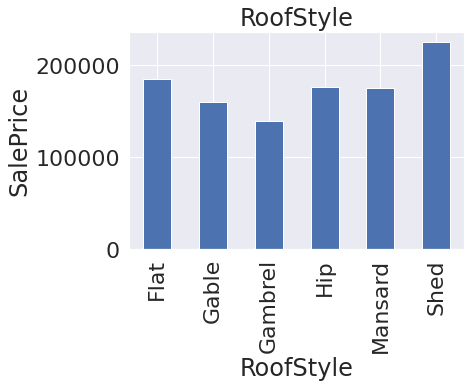

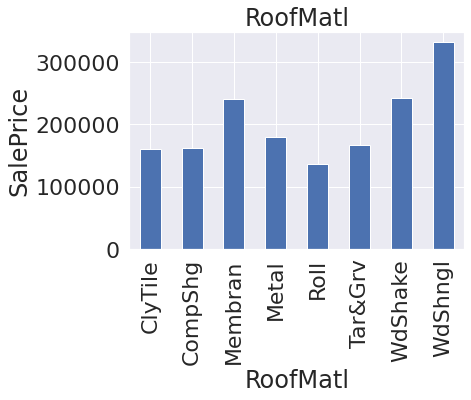

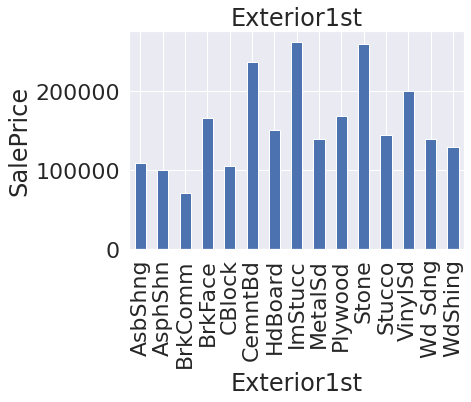

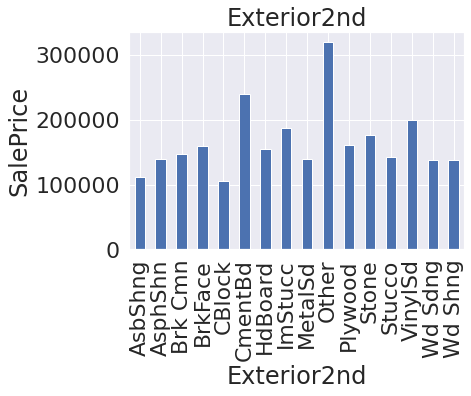

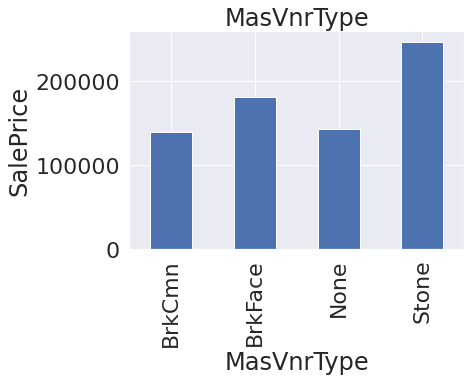

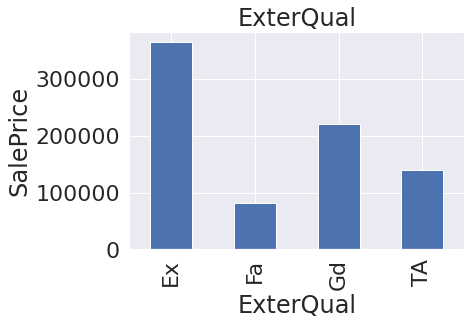

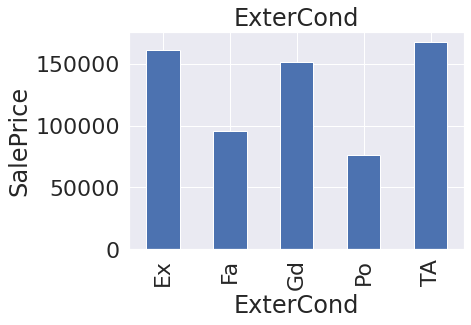

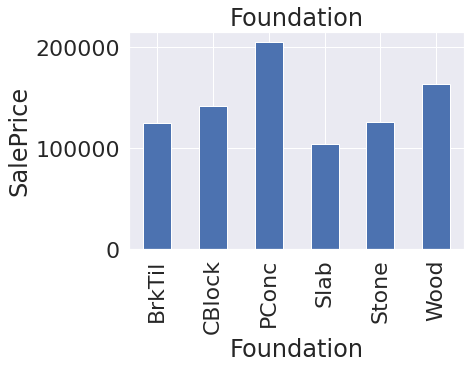

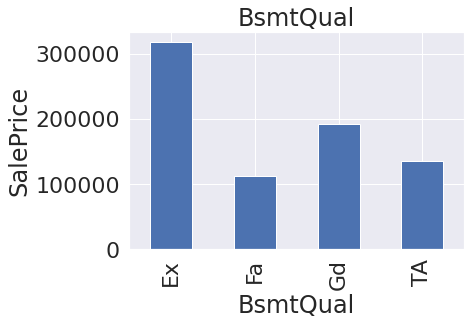

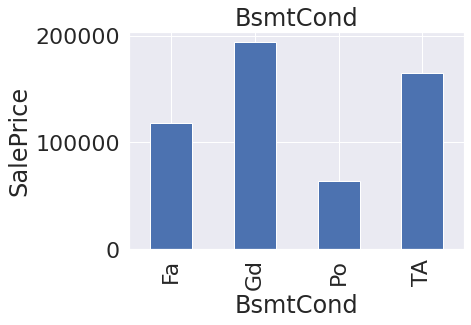

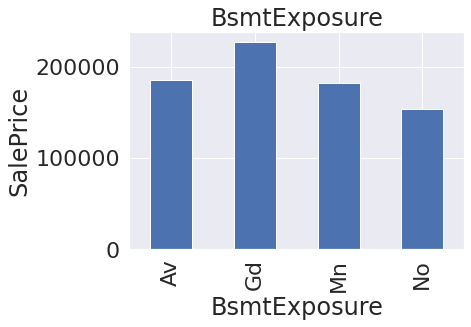

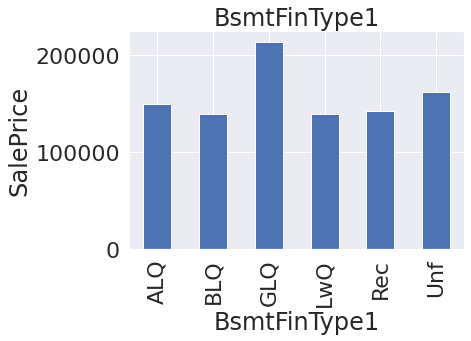

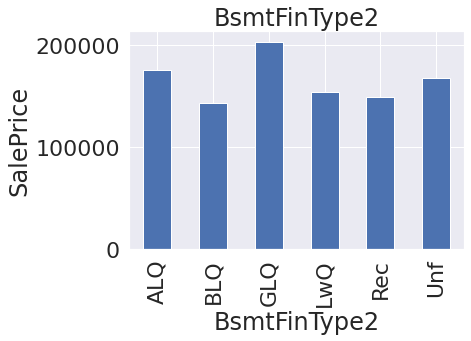

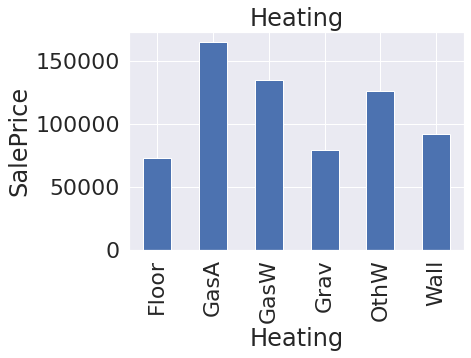

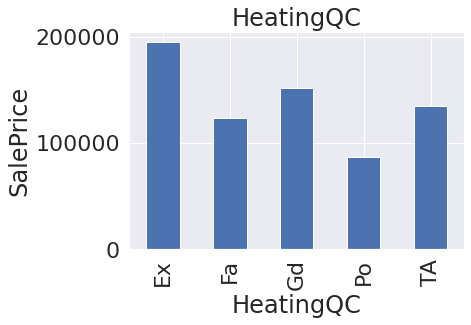

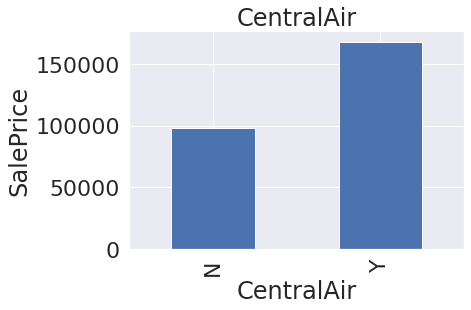

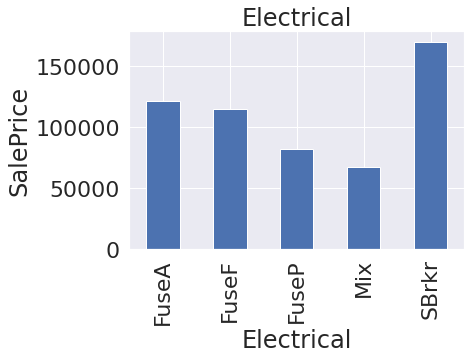

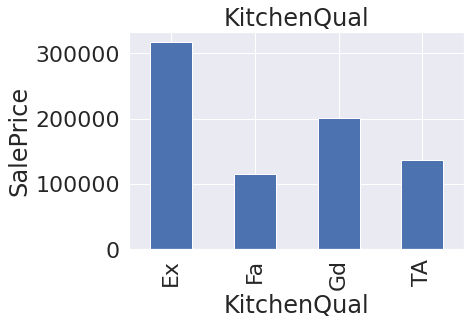

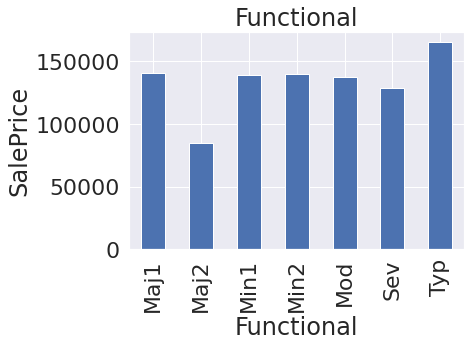

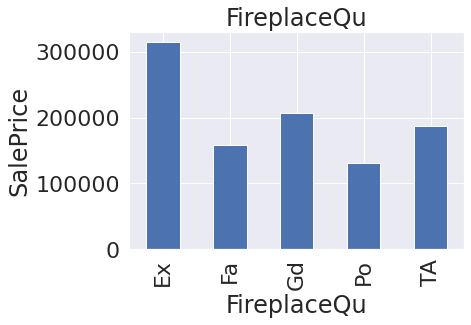

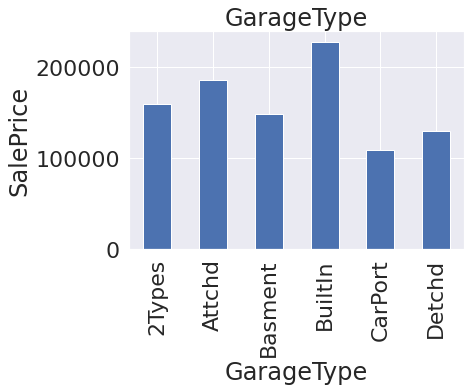

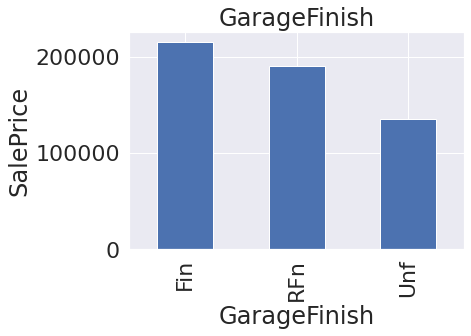

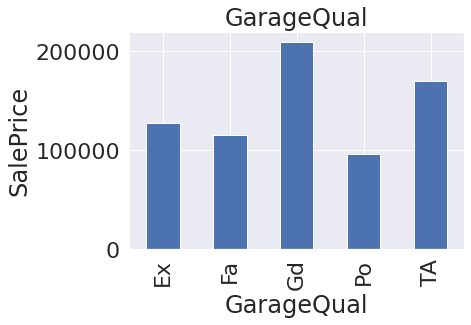

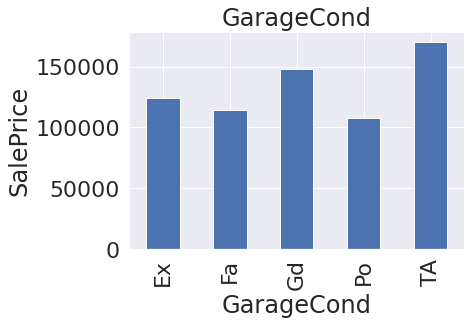

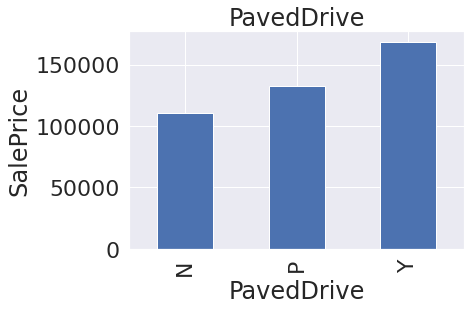

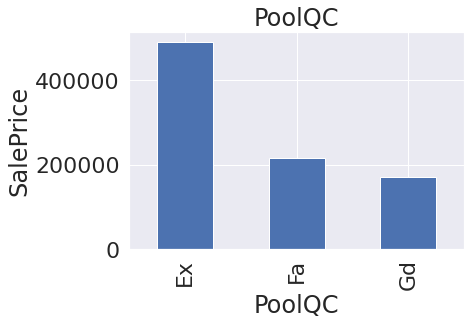

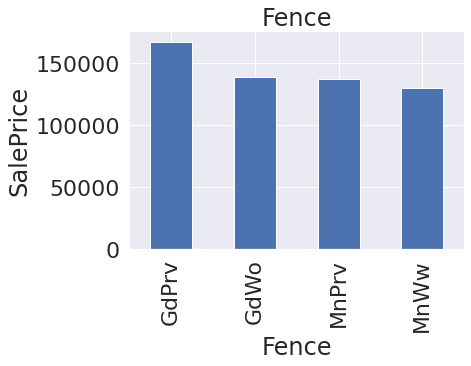

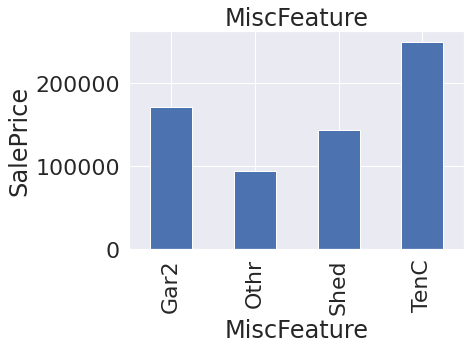

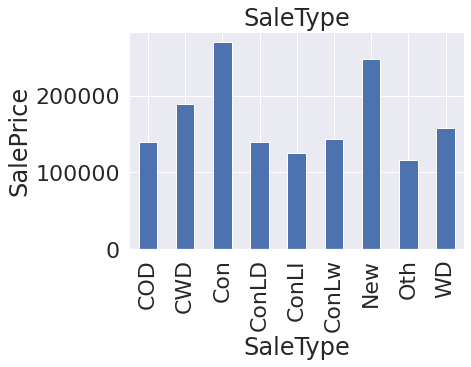

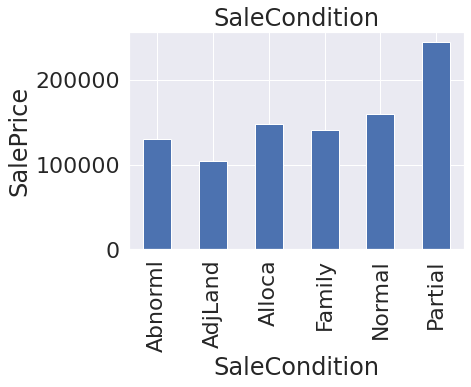

In [ ]:
# ploting the bar plot of the categorical varibale and analyse the impact of the certian columns on the target.
for features in categorical_features:
    data  = train.copy()
    data.groupby(features)['SalePrice'].median().plot.bar()
    plt.xlabel(features)
    plt.ylabel('SalePrice')
    plt.title(features)
    plt.show()

Lets check the data of the target colums to analyze it properly.
We make a histogram plot to analyze the data.

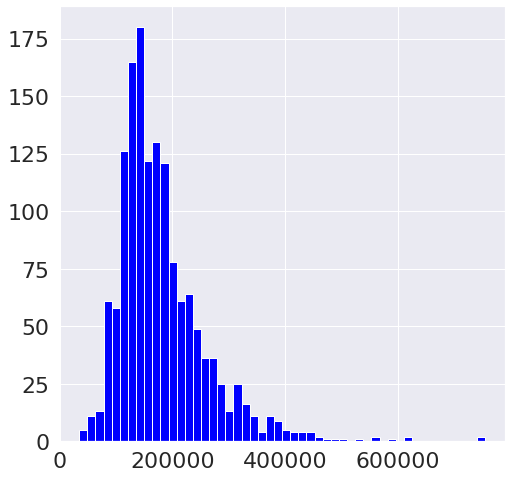

In [ ]:
figsize(8,8)

plt.hist(train["SalePrice"], bins =50, color="blue")
plt.show()

Clearing the least important columns:

In [ ]:
#dropping all the colums whose missing percentage is more that 40%

train_new = train.drop(columns= missing_train, axis=1)
test_new = test.drop(columns = missing_test, axis=1)

print(train_new.shape)
print(test_new.shape)

(1460, 76)
(1459, 75)


In [ ]:
# checking the sales type colums and plotting the diagram which contains more than 5.
saletypes = train_new["SaleType"].value_counts()
saletypes = list(saletypes[saletypes.values>5].index)
saletypes

['WD', 'New', 'COD', 'ConLD']

In [ ]:
train_new["SaleCondition"].describe()

count       1460
unique         6
top       Normal
freq        1198
Name: SaleCondition, dtype: object

In [ ]:
salecond = train_new["SaleCondition"].value_counts()
salecond = list(salecond[salecond.values>12].index)
salecond

['Normal', 'Partial', 'Abnorml', 'Family']

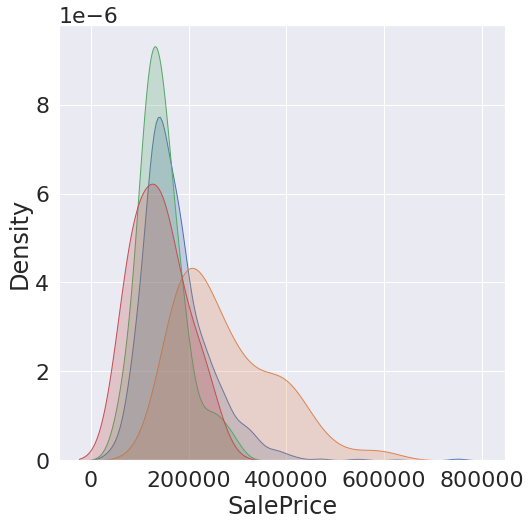

In [ ]:
figsize(8,8)

for s in saletypes:
    subset = train_new[train_new["SaleType"]==s]
    sns.kdeplot(subset["SalePrice"].dropna(), shade= True, label=s)

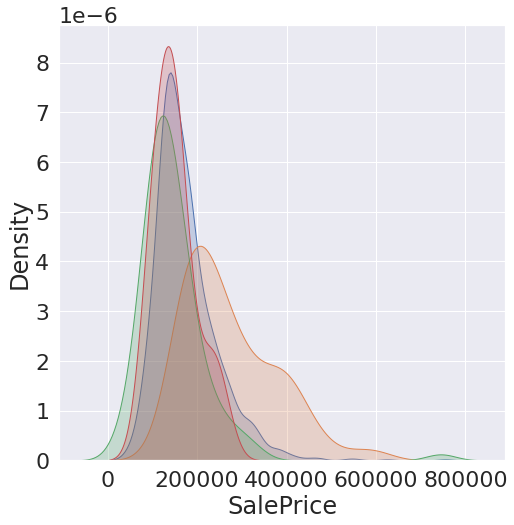

In [ ]:
figsize(8,8)

for sc in salecond:
    subset = train_new[train_new["SaleCondition"]==sc]
    sns.kdeplot(subset["SalePrice"].dropna(), shade=True, label=sc)

In [ ]:
ntypes = train_new["Neighborhood"].value_counts()
ntypes = list(ntypes[ntypes.values>87].index)
ntypes

['NAmes', 'CollgCr', 'OldTown', 'Edwards']

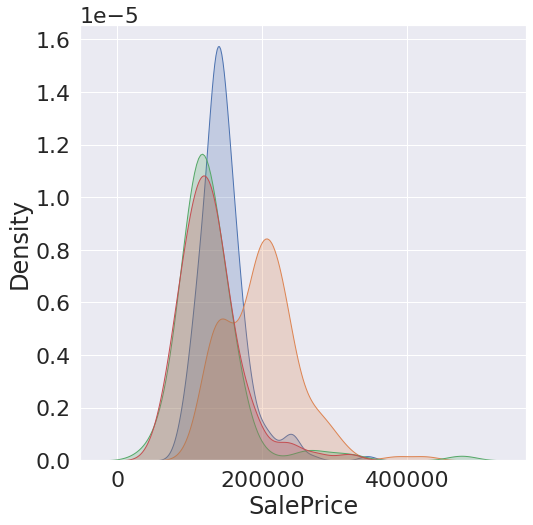

In [ ]:
for n in ntypes:
    subset = train_new[train_new["Neighborhood"]==n]
    sns.kdeplot(subset["SalePrice"].dropna(), shade=True, label=n)

In [ ]:
street = train_new["Street"].value_counts()
street = list(street.index)

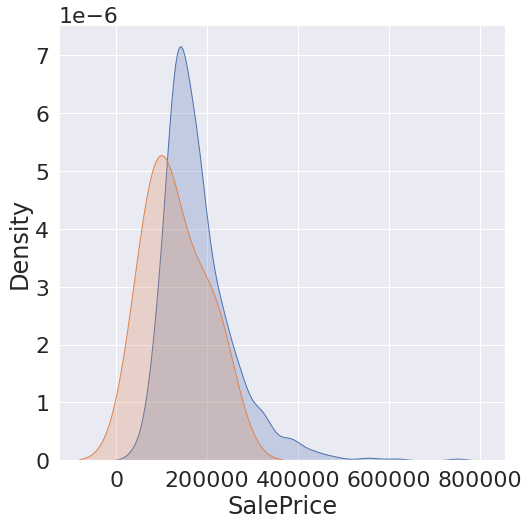

In [ ]:
for s in street:
    subset = train[ train_new["Street"] == s]
    sns.kdeplot(subset["SalePrice"].dropna(), shade=True,label=s)

In [ ]:
correlations = train_new.corr()
correlations["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

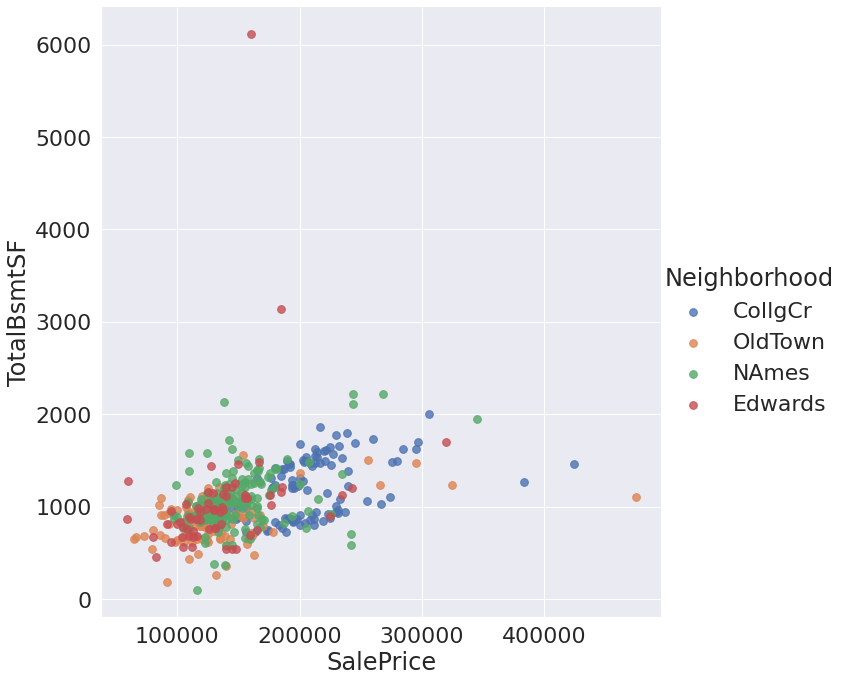

In [ ]:
figsize(8,8)
data = train_new[train_new["Neighborhood"].isin(ntypes)]
sns.lmplot(x="SalePrice", y="TotalBsmtSF", hue="Neighborhood", data = data.dropna(), 
           scatter_kws={"alpha":0.8,"s":60}, size=10, fit_reg=False)
plt.show()

# Step3: Feature Selection and Engineering

Feature engineering and selection are iterative processes that will usually require several attempts to get right. Often we will use the results of modeling, such as the feature importances from a random forest, to go back and redo feature selection, or we might later discover relationships that necessitate creating new variables. Moreover, these processes usually incorporate a mixture of domain knowledge and statistical qualitites of the data.

In [ ]:
def corr_fun(df):
    df.dropna()
    numeric = df.select_dtypes("number")
    num_cols = list(numeric.columns)
    for col in num_cols:
        if col == "SalePrice":
            continue
        else:
            numeric["sqrt_"+col] = np.sqrt(numeric[col])
            numeric["log_"+col] = np.log(numeric[col])
    cat_cols = ["Foundation","Neighborhood","GarageType","RoofStyle","Street","SaleCondition","PavedDrive","LandContour","GarageFinish"]
    dummies = pd.get_dummies(df[cat_cols])
    features = pd.concat([numeric,dummies], axis=1)
    corr_ = features.corr()["SalePrice"].sort_values(ascending=False)
    return corr_        

In [ ]:
correlations = corr_fun(train_new)

In [ ]:
correlations.head(15)

SalePrice           1.000000
OverallQual         0.790982
sqrt_OverallQual    0.767893
log_OverallQual     0.732961
sqrt_GrLivArea      0.708765
GrLivArea           0.708624
log_GrLivArea       0.695118
GarageCars          0.640409
GarageArea          0.623431
TotalBsmtSF         0.613581
1stFlrSF            0.605852
sqrt_1stFlrSF       0.604609
log_2ndFlrSF        0.598225
log_GarageCars      0.594728
log_1stFlrSF        0.591264
Name: SalePrice, dtype: float64

In [ ]:
correlations.tail()

PavedDrive_N        -0.212630
RoofStyle_Gable     -0.224744
Foundation_CBlock   -0.343263
GarageType_Detchd   -0.354141
GarageFinish_Unf    -0.410608
Name: SalePrice, dtype: float64

In [ ]:
# Creating the Dummies of the categoical datas. this listed data has more impact on the target.
def create_new_data(df):
    numeric = df.select_dtypes("number")
    num_cols = list(numeric.columns)
    for col in num_cols:
        if col == "SalePrice":
            continue
        else:
            numeric["sqrt_"+col] = np.sqrt(numeric[col])
            numeric["log_"+col] = np.log(numeric[col])
            
    cat_cols = ["Foundation","Neighborhood","GarageType","RoofStyle","Street","SaleCondition","PavedDrive","LandContour","GarageFinish"]
    dummies = pd.get_dummies(df[cat_cols])
    features = pd.concat([numeric,dummies], axis=1)
    return features 

In [ ]:
train_new = create_new_data(train_new)
test_new = create_new_data(test_new)

In [ ]:
print(train_new.shape)
print(test_new.shape)

(1460, 173)
(1459, 172)


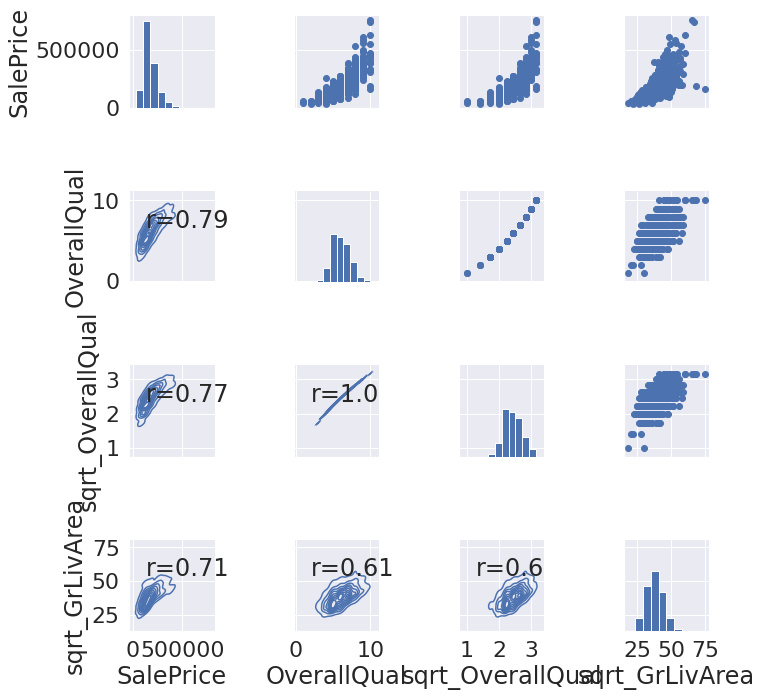

In [ ]:
columns = ["SalePrice", "OverallQual", "sqrt_OverallQual","sqrt_GrLivArea"]
plot_data = train_new[columns]

figsize(12,12)
def r_funct(x,y,**kwargs):
    r = np.corrcoef(x,y)[0][1]
    ax = plt.gca()
    ax.annotate("r={:.2}".format(r), xy=(0.2,0.6), xycoords = ax.transAxes)

plot = sns.PairGrid(plot_data)
plot.map_upper(plt.scatter)
plot.map_diag(plt.hist)
plot.map_lower(r_funct)
plot.map_lower(sns.kdeplot)
plt.show()

While variables in a dataset are usually correlated to a small degree, highly collinear variables can be redundant in the sense that we only need to retain one of the features to give our model the necessary information.

Removing collinear features is a method to reduce model complexity by decreasing the number of features and can help to increase model generalization. It can also help us to interpret the model because we only have to worry about a single variable, such as EUI, rather than how both EUI and weather normalized EUI affect the score.

In [ ]:
# Collinear removing Function
def remove_colinear(x, x_test,  threshold):
    y = x["SalePrice"]
    x = x.drop("SalePrice",1)
    cor_ = x.corr()
    drop_cols = []
    cols = list(cor_.columns)
    cols = range(len(cols)-1)
    for i in list(cols):
        for j in range(i):
            item = cor_.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            if val >= threshold:
                drop_cols.append(col.values[0])
    drops = set(drop_cols)
    x = x.drop(columns = drops, axis=1)
    x["SalePrice"]=y
    x_test = x_test.drop(columns=drops,axis =1)
    return x, x_test

In [ ]:
# Data after removing the collinerity
train_new, test_new = remove_colinear(train_new,test_new,0.6)

In [ ]:
print(test_new.shape)
print(train_new.shape)

(1459, 79)
(1460, 80)


In [ ]:
# Remove any columns with all na values
train_new  = train_new.dropna(axis=1, how = 'all')
test_new  = test_new.dropna(axis=1, how = 'all')

print(test_new.shape)
print(train_new.shape)

(1459, 79)
(1460, 80)


# Split Into Training and Testing Sets

In [ ]:
no_score = train_new[train_new['SalePrice'].isna()]
score = train_new[train_new['SalePrice'].notnull()]

print(no_score.shape)
print(score.shape)

(0, 80)
(1460, 80)


In [ ]:
features = train_new.drop("SalePrice", axis=1)
targets = train_new["SalePrice"]

In [ ]:
from sklearn.model_selection import train_test_split

X, X_test, y, y_test = train_test_split(features,targets, test_size=0.3, random_state=42)

print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(1022, 79)
(438, 79)
(1022,)
(438,)


# Establishing a Baseline

It's important to establish a naive baseline before we beginning making machine learning models. If the models we build cannot outperform a naive guess then we might have to admit that machine learning is not suited for this problem. This could be because we are not using the right models, because we need more data, or because there is a simpler solution that does not require machine learning. Establishing a baseline is crucial so we do not end up building a machine learning model only to realize we can't actually solve the problem.

For a regression task, a good naive baseline is to predict the median value of the target on the training set for all examples on the test set. This is simple to implement and sets a relatively low bar for our models: if they cannot do better than guessing the medin value, then we will need to rethink our approach.

In [ ]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())


baseline_guess = np.median(y)

print("The baseline guess is a score of", baseline_guess)
print("The baseline performance on the test set: root mean squared error =", rmse(y_test,baseline_guess))

The baseline guess is a score of 165000.0
The baseline performance on the test set: root mean squared error = 84872.40373742781


# Step:4 Evaluating and Comparing Machine Learning Models

In this section we will build, train, and evalute several machine learning methods for our supervised regression task. The objective is to determine which model holds the most promise for further development (such as hyperparameter tuning).

# Imputing Missing Values

Standard machine learning models cannot deal with missing values, and which means we have to find a way to fill these in or disard any features with missing values. Since we already removed features with more than 40% missing values in the first part, here we will focus on filling in these missing values, a process known as imputation.

There are a number of methods for imputation but here we will use the relatively simple method of replacing missing values with the median of the column.

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(X,y)
X= imputer.transform(X)
X_test= imputer.transform(X_test)
test_new = imputer.transform(test_new)

In [ ]:
print('Missing values in training features: ', np.sum(np.isnan(X)))
print('Missing values in testing features:  ', np.sum(np.isnan(X_test)))

print('Missing values in test_new features:  ', np.sum(np.isnan(test_new)))

Missing values in training features:  0
Missing values in testing features:   0
Missing values in test_new features:   0


In [ ]:
# Make sure all values are finite
print(np.where(~np.isfinite(X)))
print(np.where(~np.isfinite(X_test)))

print(np.where(~np.isfinite(test_new)))

(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


# Scaling Feature

The final step to take before we can build our models is to scale the features. This is necessary because features are in different units, and we want to normalize the features so the units do not affect the algorithm.It is a best practice to scale features when we are comparing multiple algorithms.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler (feature_range=(0,1))
scaler.fit(X,y)

X = scaler.transform(X)
X_test = scaler.transform(X_test)

test_new = scaler.transform(test_new)

In [ ]:
# Convert y and y_test to one-dimensional array (vector)
y = np.array(y).reshape((-1,))
y_test = np.array(y_test).reshape((-1,))

# Models to Evaluate

We will compare five different machine learning models using the great Scikit-Learn library:

1. Linear Regression
2. Support Vector Machine Regression
3. Random Forest Regression
4. Gradient Boosting Regression
5. K-Nearest Neighbors Regression

In [ ]:
# Function to calculate root mean square error
def rmse (y_true,y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))

In [ ]:
# Takes in a model, trains the model, and evaluates the model on the test set
def model_test(model):
    model.fit(X,y)
    predictions = model.predict(X_test)
    model_rsme = rmse(y_test,predictions)
    return model_rsme

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
lr = LinearRegression()
lr_rsme = model_test(lr)
print(" the root mean squared error for linear regression is:", lr_rsme)

 the root mean squared error for linear regression is: 32499.006129492307


In [ ]:
knn = KNeighborsRegressor(n_neighbors=5)
knn_rsme = model_test(knn)
print(" the root mean squared error for K nearest neighbors is:", knn_rsme)

 the root mean squared error for K nearest neighbors is: 43717.207492627254


In [ ]:
svm = SVR()
svm_rsme = model_test(svm)
print(" the root mean squared error for Support vector machine is:", svm_rsme)

 the root mean squared error for Support vector machine is: 84850.34252924137


In [ ]:
tree = DecisionTreeRegressor()
tree_rsme = model_test(tree)
print(" the root mean squared error for decision tree is:", tree_rsme)

 the root mean squared error for decision tree is: 44796.285807334745


In [ ]:
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)
rf_rsme = model_test(rf)
gb_rsme = model_test(gb)
print(" the root mean squared error for randoom forest is:", rf_rsme)
print(" the root mean squared error for gradient boosting is:", gb_rsme)

 the root mean squared error for randoom forest is: 29398.170027713244
 the root mean squared error for gradient boosting is: 27278.50921310604


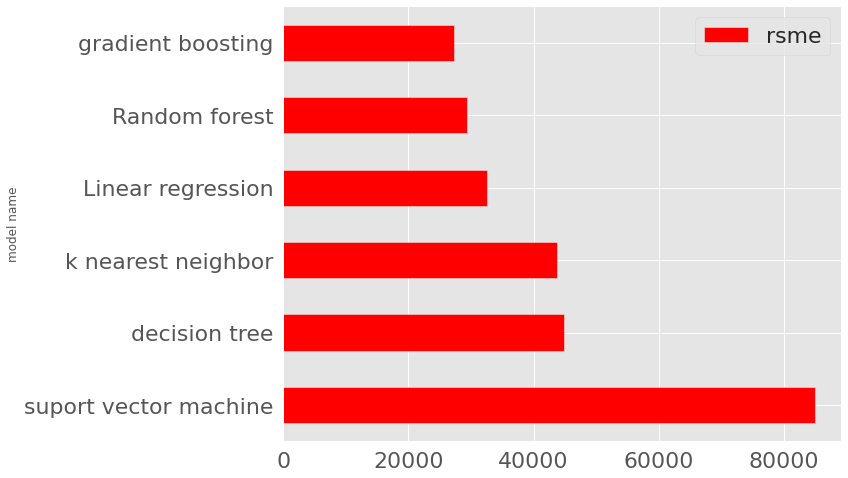

In [ ]:
# Plotting in the graph of the rootmean square

figsize(10,8)

plt.style.use("ggplot")
model_comparison = pd.DataFrame({"model name":["Linear regression", "k nearest neighbor", "suport vector machine",
                                              "decision tree", "Random forest", "gradient boosting"],
                                "rsme": [lr_rsme,knn_rsme,svm_rsme,tree_rsme,rf_rsme,gb_rsme]})
model_comparison = model_comparison.sort_values("rsme", ascending=False).plot(x="model name", y="rsme", color="red", kind="barh")

From the above plot the gradient boosting regressor performs the best followed by the random forest. I have to admit that this is not the most fair comparison because we are using mostly the default hyperparameters. Especially with the Support Vector Regressor, the hyperparameters have a significant influence on performance. 

Nonetheless, from these results, we can conclude that machine learning is applicable because all the models significantly outperform the baseline!

# Step 5: Model Optimization

We as data scientists control a model by choosing the hyperparameters, and these choices can have a significant effect on the final performance of the model 

We will start with: 

1. Hyperparameter Tuning with Random Search
2. Hyperparameter Tuning with Random Search Cross Validation

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

gf = GradientBoostingRegressor(random_state=42)

# Setting the parameters to gain the best results

loss = ['ls', 'lad', 'huber', 'quantile']
n_estimators = [100, 300, 500,700, 900, 1100, 1300]
min_samples_split = [2,3,4,6,8,10,12]
min_samples_leaf = [1,2,4,5,6,7,8]
max_depth =[2,3,4,5,6,7,8]
max_features = ["auto","sqrt","log2",None]

hyperparameter_grid = {"loss":loss,
                      "n_estimators":n_estimators,
                      "min_samples_split":min_samples_split,
                      "max_depth":max_depth,
                      "min_samples_leaf":min_samples_leaf,
                      "max_features":max_features}



random_cv = RandomizedSearchCV(estimator=gf, param_distributions = hyperparameter_grid, cv=5,
                              n_iter=30, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=1,
                              return_train_score=True, random_state=42)

In [ ]:
#fitting the model with random search CV
random_cv.fit(X,y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'loss': ['ls', 'lad', 'huber',
                                                 'quantile'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4, 5, 6, 7,
                                                             8],
                                        'min_samples_split': [2, 3, 4, 6, 8, 10,
                                                              12],
                                        'n_estimators': [100, 300, 500, 700,
                                                         900, 1100, 1300]},
                   random_state=42, return_train_score=True,
                   s

In [ ]:
rand_results = pd.DataFrame(random_cv.cv_results_).sort_values("mean_test_score", ascending=False)
rand_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_loss,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
10,0.924885,0.015514,0.005525,0.000095,1300,8,2,log2,2,ls,...,-17766.589902,2222.115550,1,-6238.421520,-5626.784783,-6244.788201,-6075.352465,-6180.997094,-6073.268813,231.366389
19,7.192721,0.130368,0.007746,0.000403,700,8,7,log2,6,huber,...,-17798.695257,2115.665489,2,-2257.637754,-1889.950497,-2241.535618,-2239.106729,-2203.046958,-2166.255511,139.300524
15,1.045312,0.021289,0.002122,0.000140,300,6,6,sqrt,2,huber,...,-17843.526511,2103.682858,3,-11880.618588,-11054.543417,-12120.417830,-12108.378777,-12368.613097,-11906.514341,453.114612
24,8.018646,0.090060,0.005162,0.000105,300,3,7,None,8,lad,...,-17896.137578,2076.161641,4,-4196.164574,-3681.430234,-4178.146813,-4196.558510,-4490.287768,-4148.517580,260.934286
26,0.500860,0.001836,0.003450,0.000096,500,10,5,sqrt,3,ls,...,-17930.794600,2434.268419,5,-6017.804502,-5668.322222,-6183.875233,-5896.403906,-6027.387787,-5958.758730,171.531501
1,0.980124,0.013365,0.005885,0.000144,1300,6,5,log2,2,ls,...,-18011.843039,2466.917689,6,-6716.290249,-6219.222855,-6645.502902,-6684.577197,-6774.791004,-6608.076841,198.979492
0,9.414313,1.793952,0.007411,0.000174,700,4,1,log2,6,lad,...,-18108.736562,1812.378460,7,-3014.176908,-2725.588173,-2680.876602,-2821.715217,-2960.119447,-2840.495269,129.235990
17,1.450113,0.023902,0.012973,0.000249,1100,6,6,log2,6,ls,...,-18157.248297,2309.817708,8,-112.095716,-82.401714,-100.048422,-106.223881,-97.032780,-99.560503,10.025803
8,1.032171,0.020391,0.001948,0.000045,100,2,7,log2,6,lad,...,-18203.021147,1256.367686,9,-10294.377574,-9408.213872,-10341.777358,-10536.039824,-10502.144274,-10216.510580,414.435555
4,0.148917,0.009048,0.001934,0.000023,100,12,2,log2,6,ls,...,-18270.287977,2053.799180,10,-6075.225569,-5978.391166,-6122.906049,-6024.318258,-6144.632578,-6069.094724,61.434975


In [ ]:
rand_results[["mean_test_score","mean_train_score"]].head()

,mean_test_score,mean_train_score
10,-17766.589902,-6073.268813
19,-17798.695257,-2166.255511
15,-17843.526511,-11906.514341
24,-17896.137578,-4148.517580
26,-17930.794600,-5958.758730


In [ ]:
random_cv.best_estimator_

GradientBoostingRegressor(loss='ls', max_depth=2, max_features='log2',
                          min_samples_leaf=2, min_samples_split=8,
                          n_estimators=1300, random_state=42)

Using random search is a good method to narrow down the possible hyperparameters to try. Initially, we had no idea which combination would work the best, but this at least narrows down the range of options.

In [ ]:
trees_grid = {"n_estimators":[50,60,100,150,170,190,220,250,300,350,400],
             }

gf = GradientBoostingRegressor(criterion='friedman_mse',
                           loss='lad', max_depth=2,
                          max_features='sqrt',
                          min_impurity_decrease=0.0,
                          min_samples_leaf=4, min_samples_split=4,
                          min_weight_fraction_leaf=0.0,
                          random_state=42, subsample=1.0
                          )
grid_search = GridSearchCV(estimator=gf,
    param_grid=trees_grid,scoring="neg_root_mean_squared_error",n_jobs=-1,cv=10,verbose=1,
                           return_train_score=True)

In [ ]:
grid_search.fit(X,y)

Fitting 10 folds for each of 11 candidates, totalling 110 fits


GridSearchCV(cv=10,
             estimator=GradientBoostingRegressor(loss='lad', max_depth=2,
                                                 max_features='sqrt',
                                                 min_samples_leaf=4,
                                                 min_samples_split=4,
                                                 random_state=42),
             n_jobs=-1,
             param_grid={'n_estimators': [50, 60, 100, 150, 170, 190, 220, 250,
                                          300, 350, 400]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=1)

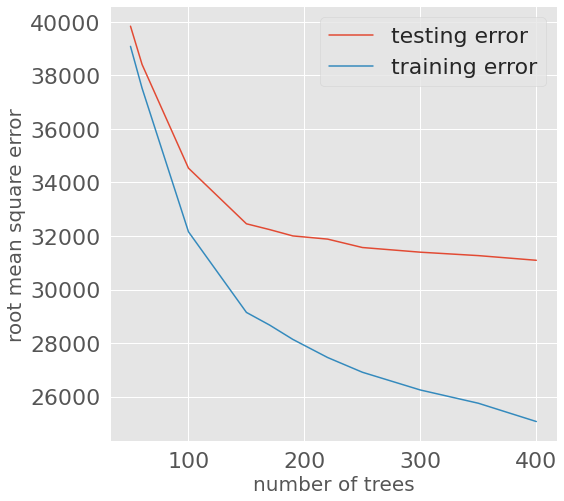

In [ ]:
results = pd.DataFrame(grid_search.cv_results_)
figsize(8,8)
plt.style.use("ggplot")
plt.plot(results["param_n_estimators"], -1*results["mean_test_score"], label="testing error")
plt.plot(results["param_n_estimators"], -1*results["mean_train_score"], label="training error")
plt.legend()
plt.ylabel("root mean square error", size=20)
plt.xlabel("number of trees", size= 20)
plt.show()

From this plot, it's pretty clear that our model is overfitting! The training error is similar to  the testing error, which shows that the model is good. 

Moveover, as the number of trees increases, the amount of overfitting increases. Both the test and training error decrease as the number of trees increase but the training error decreases more rapidly.

# Evaluate the Final Model of the Test Set

We will use the best model from hyperparameter tuning to make predictions on the testing set. 

Remember, our model has never seen the test set before, so this performance should be a good indicator of how the model would perform if deployed in the real world.

In [ ]:
default_model = GradientBoostingRegressor(random_state=42)
final_model = grid_search.best_estimator_
final_model

GradientBoostingRegressor(loss='lad', max_depth=2, max_features='sqrt',
                          min_samples_leaf=4, min_samples_split=4,
                          n_estimators=400, random_state=42)

In [ ]:
%%timeit -n 1 -r 5
default_model.fit(X,y)

462 ms ± 8.1 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [ ]:
%%timeit -n 1 -r 5
final_model.fit(X,y)

810 ms ± 10.2 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [ ]:
default_pred = default_model.predict(X_test)
final_pred = final_model.predict(X_test)

In [ ]:
print("the default model performance on the test set: rsme = %0.4f"  %rmse(y_test,default_pred))
print("the final model performance on the test set: rsme = %0.4f" %rmse(y_test,final_pred))

the default model performance on the test set: rsme = 27278.5092
the final model performance on the test set: rsme = 27580.3182


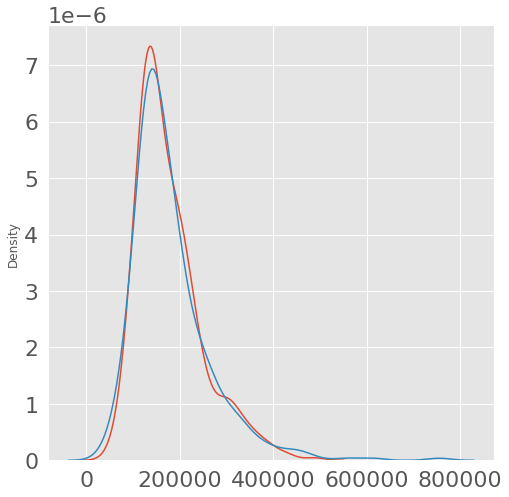

In [ ]:
figsize(8,8)
sns.kdeplot(final_pred, label="predictions")
sns.kdeplot(y_test, label="test values")
plt.show()

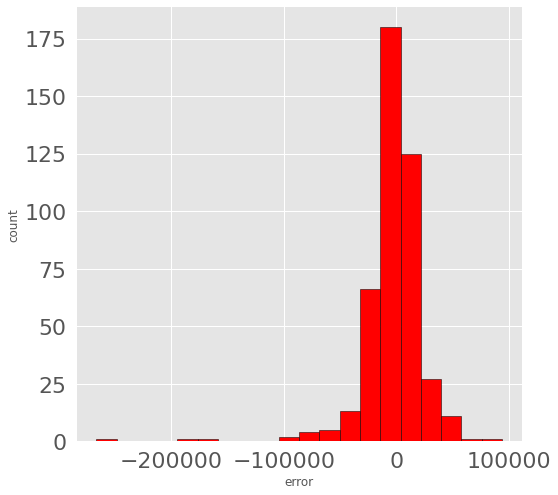

In [ ]:
figsize =(6,6)
residuals = final_pred - y_test

plt.hist(residuals, color = "red", bins=20, edgecolor="black")
plt.ylabel("count")
plt.xlabel("error")
plt.show()

The results showed us that machine learning is applicable to our problem, with the final model able to the predict the SalePrice. 
We also saw that hyperparamter tuning was able to improve the performance of the model although at a considerable cost in terms of time invested. This is a good reminder that proper feature engineering and gathering more data has a much larger pay-off than fine-tuning the model. 
We also observed the trade-off in run-time versus accuracy, which is one of many considerations we have to take into account when designing machine learning models.

In [ ]:
test_predictions = final_model.predict(test_new)

In [ ]:
test_ids = test["Id"]
submission= {"Id": test_ids, "SalePrice":test_predictions}
submission = pd.DataFrame(submission)
submission.to_csv("submission_housing.csv", index=False)

In [ ]:
submission.head()

,Id,SalePrice
0,1461,139058.940324
1,1462,164930.082290
2,1463,190885.865200
3,1464,191640.124190
4,1465,206236.820846


In [ ]:
submission.shape[0]

1459

In [ ]:
from sklearn.metrics import mean_squared_log_error

score = mean_squared_log_error(y_test,final_pred)

In [ ]:
score

0.01755678236272128

# Artifical Neural Network Implementation

In [ ]:
# Importing the Keras libraries and packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping


# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense( 50, activation='relu',input_dim = X.shape[1]))

# Adding the second hidden layer
model.add(Dense(25,activation='relu'))

# Adding the third hidden layer
model.add(Dense(50,activation='relu'))
# Adding the output layer
model.add(Dense(1))

# Compiling the ANN
model.compile(loss='mean_squared_error', optimizer='Adamax')

#create monitor
monitor = EarlyStopping(monitor = 'val_loss', min_delta = 1e-3, patience=5, verbose=1, mode= "auto")

# Fitting the ANN to the Training set
model_history=model.fit(X,y, callbacks = [monitor], validation_split=0.20, batch_size = 10,epochs = 1000)

Epoch 1/1000
82/82 [==============================] - 1s 4ms/step - loss: 38961799168.0000 - val_loss: 38610157568.0000
Epoch 2/1000
82/82 [==============================] - 0s 2ms/step - loss: 38951940096.0000 - val_loss: 38589308928.0000
Epoch 3/1000
82/82 [==============================] - 0s 2ms/step - loss: 38909734912.0000 - val_loss: 38513741824.0000
Epoch 4/1000
82/82 [==============================] - 0s 2ms/step - loss: 38783102976.0000 - val_loss: 38328307712.0000
Epoch 5/1000
82/82 [==============================] - 0s 3ms/step - loss: 38517329920.0000 - val_loss: 37939687424.0000
Epoch 6/1000
82/82 [==============================] - 0s 2ms/step - loss: 37983244288.0000 - val_loss: 37258665984.0000
Epoch 7/1000
82/82 [==============================] - 0s 3ms/step - loss: 37158588416.0000 - val_loss: 36226809856.0000
Epoch 8/1000
82/82 [==============================] - 0s 2ms/step - loss: 35914240000.0000 - val_loss: 34704871424.0000
Epoch 9/1000
82/82 [====================

In [ ]:
ann_pred = model.predict(X_test)
score = mean_squared_log_error(y_test,ann_pred)

14/14 [==============================] - 0s 1ms/step


In [ ]:
print(score)

0.02778604845208326
